In [52]:
%run code/import_libs.py
%run code/functions_v1.4.py
%run code/Build_Forms_v1.4.py
%run code/initial_data_prep.py

%matplotlib inline


import sys
#sys.path.append( '/c/DataScience/Flatiron/Projects/Phase2/Phase-2-Flatiron-Project/code' )


In [53]:
df.shape


(21143, 28)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [55]:

#FILTER

#df=df[df['yr_built']>1981]
#df=df[df['price']<800000].copy()
#df=df[df['sqft_living']<3000].copy()
#df=df[df['sqft_lot']<100000].copy()

df=df[~df["grade"].isin([3,4,5])]


initial_pred = df.drop(columns=["price"]).copy()
initial_price = df[["price"]]


In [56]:
x1, y1 = transform_data(initial_pred, initial_price)



x1['interact3']=x1['grade']*df['condition']
x1['interact5']=x1['sqft_living']*x1['grade']
x1['interact6']= x1['sqft_living']*x1['sqft_lot']
#x1['decade']=df['decade']



#x1['price_per_sqft']=df['price_per_sqft']
#x1.drop('grade',axis=1,inplace=True)

#x1['interact6']=df['grade']*df['after_1980']




In [57]:
pred=x1
price=y1
pred_int = sm.add_constant(pred)
model = sm.OLS(price,pred_int).fit()
#print(model.rsquared)

coef_df=model.params.reset_index()
coef_df.columns=["Column","Value"]

#x1['zip_98032'].sum()
model.summary()

#get_decade(1955)

coef_df[ coef_df['Column'] == get_decade(1935)] ["Value"].tolist()[0]

#get_decade(1935)
#dec_1920-1939
list(df['decade'].sort_values().unique())[-1]


'2010-2029'

In [58]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=3)

baseline = np.mean(cross_val_score(regression, x1, y1, scoring='r2', cv=crossvalidation))
baseline

0.8848148490266311

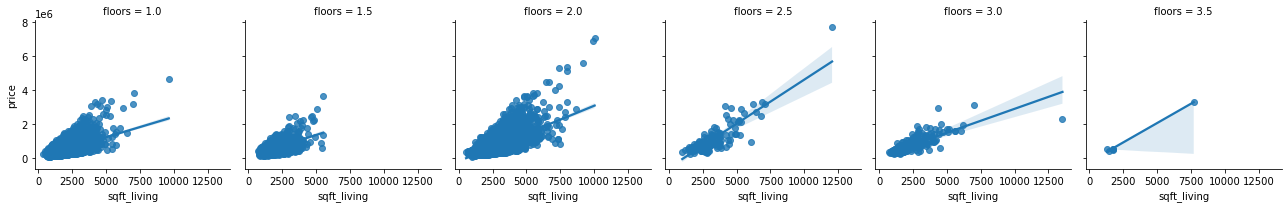

In [1307]:

transformed_df=pd.concat([initial_pred, initial_price], axis=1)
g = sns.FacetGrid(df, col="floors") 
g.map(sns.regplot, "sqft_living", "price")



In [982]:
df.grade.astype('category')

id
7129300520    7
6414100192    7
5631500400    6
2487200875    7
1954400510    8
             ..
263000018     8
6600060120    8
1523300141    7
291310100     8
1523300157    7
Name: grade, Length: 20880, dtype: category
Categories (8, int64): [6, 7, 8, 9, 10, 11, 12, 13]